# 10주차

**groupby**



<br>

본 실습은 **pandas 1.5.3**버전이며, 주피터 노트북으로 진행됩니다.

---


### 목차 

[**언피벗(unpivot)**](#chapter1)
* [1. 언피벗(unpivot)을 하는 이유](#chapter2)
* [2. stack + reset_index로 언피벗하기](#chapter3)
* [3. melt 함수로 언피벗하기](#chapter4)
* [4. 언피벗 후 다시 피벗테이블 만들기](#chapter5)
* [**예제** 예제 마트 매출 집계 데이터로 특정 데이터만 집계하기](#chapter6)

[**groupby**](#chapter7)
* [1. groupby가 필요한 이유 ](#chapter8)
* [2. groupby 함수](#chapter9)
    * [2-1. groupby로 feature engineering 하기](#chapter10)
    * [2-2. groupby로 집계함수 적용하기](#chapter11)
* [**예제** 채권 데이터로 여러가지 그룹 집계하기](#chapter12)

---
<br>


## 1. 언피벗(unpivot) <a class="anchor" id="chapter1"></a>

### 1. 언피벗(unpivot)을 하는 이유 <a class="anchor" id="chapter2"></a>

**원시(raw) 데이터와 피벗 테이블(pivot table)의 장단점**

원시 데이터(raw data)

- 데이터를 쌓고 관리하기 쉽다

- 데이터의 의미 파악이 어렵다

피벗 테이블(pivot table)

- 데이터 의미 파악이 쉽다

- 데이터를 쌓고 관리하기 어렵다

→ 그래서 원시(raw) 데이터로 데이터를 쌓고 관리하며, 피벗 테이블로는 요약을 해야 한다

그럼에도 실무에서는 피벗 테이블로 데이터를 관리하는 경우가 많다.

---

<br>

**피벗 테이블로 데이터를 관리하는 경우의 문제점**

<img src=https://i.ibb.co/mhJ9kbR/image.png, width=600>

위 그림은 왼쪽과 같은 피벗테이블로 데이터를 관리하고 있는 상황이다.

피벗 테이블로 데이터를 관리하면 우측과 같이 새로운 피벗테이블 만드는 것이 어렵다

위 예시는 단순한 구조라서 그나마 가능하겠지만 복잡한 피벗테이블을 다른 복잡한 피벗테이블로 전환은 정말 쉽지 않다.


물론 왼쪽 피벗테이블을 만드는 원시 데이터가 있었다면 우측의 피벗테이블도 쉽게 만들 수 있을 것이다

다만 데이터를 피벗 테이블로 관리하면 원시 데이터는 존재하지 않는 경우가 대부분이다.

이럴 때는 어떻게 해야 할까?

→ 그 때 필요한 것이 언피벗(unpivot)이다.


---
<br>

**언피벗(unpivot)이란?**

<img src=https://i.ibb.co/CKZqNyd/image.png, width=600>

언피벗은 피벗 테이블을 마치 원시(raw) 데이터처럼 열은 특성(feature), 행은 개별 데이터인 테이블로 만드는 것이다.

언피벗하면 values는 하나의 열이 되고 값에 맞춰 index와 columns가 새로운 열이 된다

언피벗을 하면 원시 데이터와 같은 특징을 가지기 때문에 새로운 방향으로 피벗 테이블을 만들기 쉽고 데이터를 쌓기도 쉽다



---
<br>

**언피벗을 하는 방법**

판다스에서는 두가지 방법으로 언피벗이 가능하다

1. `stack` + `reset_index` : `stack`은 그 자체로 유용한 함수라 unpivot을 위해 함수를 추가적으로 익히지 않아도 된다


2. `melt` : `melt`는 unpivot 전용 함수라 편리하다

이 두가지 방법을 알아보자

---

<br>




### 2. stack + reset_index로 언피벗하기 <a class="anchor" id="chapter3"></a>

**새로운 함수 소개**

> pandas stack & unstack

<img src=https://i.ibb.co/LZNRJCN/image.png, width=600>

stack은 columns를 index로 보내고 unstack은 index를 columns로 보낸다

> stack 함수의 인자(parameter)들

**level** (level의 레이블 혹은 로케이션, 또는 그것들의 리스트 / 기본값은  -1)

index로 보낼 columns의 level을 지정하는 인자. 기본값은 -1이라서 맨 마지막 columns를 보낸다

 

**dropna** (인수는 bool / 기본값은 True)

값이 NaN인 행은 생성하지 않고 삭제하는 인자. 기본값은 True


---

<br>

> unstack 함수의 인자(parameter)들

**level** (level의 레이블 혹은 로케이션, 또는 그것들의 리스트 / 기본값은  -1)

columns로 보낼 index의 level을 지정하는 인자. 기본값은 -1이라서 맨 마지막 index를 보낸다

 

 

**fill_value**

NaN을 대체할 값을 지정하는 인자


---

<br>

In [1]:
# 실습 준비 코드
import pandas as pd
data1 = [[10, 20, 30, 40], [15, 25, 35, 45]]
data2 = [[10, 30], [20, 40], [15, 35]]
col1 = pd.MultiIndex.from_product([['남', '여'], ['A반', 'B반']])
df1 = pd.DataFrame(data1, index=['1학년', '2학년'], columns=col1)
df2 = pd.DataFrame(data2, index=list('ABC'), columns=['남', '여'])

In [2]:
# 실습에 쓰일 df1출력
df1

남       여    
     A반  B반  A반  B반
1학년  10  20  30  40
2학년  15  25  35  45

In [3]:
# stack으로 df1의 구조 바꾸기 - 반의 구분을 index로 보내기
df1.stack()

남   여
1학년 A반  10  30
    B반  20  40
2학년 A반  15  35
    B반  25  45

In [4]:
# stack으로 level을 0으로 지정해 성별의 구분을 index로 보내기
df1.stack(0)

A반  B반
1학년 남  10  20
    여  30  40
2학년 남  15  25
    여  35  45

In [5]:
# level을 복수로 지정해 반과 성별을 모두 index로 보내기
df1.stack([0, 1])

1학년  남  A반    10
        B반    20
     여  A반    30
        B반    40
2학년  남  A반    15
        B반    25
     여  A반    35
        B반    45
dtype: int64

**stack과 언피벗(unpivot)과의 관계**

<img src=https://i.ibb.co/TTSh45t/image.png, width=600>

`stack`으로 모든 columns를 index로 보내고 `reset_index`를 하면 언피벗(unpivot)한 결과가 된다.

단 이 경우 `reset_index` 적용 후에 열 이름은 바꿔줘야 한다

---
<br>
    

In [6]:
# 실습에 쓰일 df2
df2

,남,여
A,10,30
B,20,40
C,15,35


In [7]:
# df2를 stack + reset_index로 unpivot 하기
df2.stack().reset_index()

,level_0,level_1,0
0,A,남,10
1,A,여,30
2,B,남,20
3,B,여,40
4,C,남,15
5,C,여,35


In [8]:
# 위 결과의 열이름을 반, 성별, 인원수로 지정하기
df2.stack().reset_index().set_axis(['반', '성별', '인원수'], axis=1)

,반,성별,인원수
0,A,남,10
1,A,여,30
2,B,남,20
3,B,여,40
4,C,남,15
5,C,여,35


### 3. melt 함수로 언피벗하기 <a class="anchor" id="chapter4"></a>


**새로운 함수 소개**

> pandas melt


<img src=https://i.ibb.co/vBMZHB4/image.png, width=600>


데이터 프레임을 unpivot 하는 함수


> melt 함수의 인자(parameter)들

**id_vars** (열의 레이블 혹은 그것들의 리스트)

index처럼 unpivot 하지 않을 열을 지정하는 인자

**value_vars** (열의 레이블 혹은 그것들의 리스트)

unpivot될 열들을 지정하는 인자

기본값으로 id_vars로 지정되지 않은 모든 열을 value_vars로 지정해 unpivot한다

**var_name** (scalar)

unpivot 후 'variable'열의 레이블을 지정하는 인자

**value_name** (scalar/ 기본값은 'value')

unpivot 후 'value'열의 레이블을 지정하는 인자

---
**vars의 의미**

variables의 약자이지만 여기서는 column을 의미한다

id_vars : index처럼 처리할 column들을 지정하는 인자

value_vars : values 처럼 처리할 column들을 지정하는 인자

var_name : 언피벗 하기 전에 column들의 이름들이 언피벗후에 들어가게 되는 열이 있는데 그 열의 이름을 지정하는 인자 

(기본 값은 variable) 

---

<br>

In [9]:
# 실습 준비 코드
import pandas as pd
data = [['A', 10, 30], ['B', 20, 40], ['C', 15, 35]]
df = pd.DataFrame(data, columns=['반', '남', '여'])
df

,반,남,여
0,A,10,30
1,B,20,40
2,C,15,35


In [10]:
# melt로 반은 특성으로 두고 남,여 열을 언피벗
df.melt('반')

,반,variable,value
0,A,남,10
1,B,남,20
2,C,남,15
3,A,여,30
4,B,여,40
5,C,여,35


In [11]:
# 언피벗 후 열 이름을 반, 성별, 인원수로 바꾸기 (set_index 함수 사용)
df.melt('반').set_axis(['반', '성별', '인원수'], axis=1)

,반,성별,인원수
0,A,남,10
1,B,남,20
2,C,남,15
3,A,여,30
4,B,여,40
5,C,여,35


In [12]:
# 언피벗 후 열 이름을 반, 성별, 인원수로 바꾸기 (melt 함수의 인자 사용)
df.melt('반', var_name='성별', value_name='인원수')

,반,성별,인원수
0,A,남,10
1,B,남,20
2,C,남,15
3,A,여,30
4,B,여,40
5,C,여,35


## 4. 언피벗 후 다시 피벗테이블 만들기<a class="anchor" id="chapter6"></a>

**언피벗 후 다시 피벗테이블 만들기**

1. index에 필요한 데이터가 있다면 `stack` + `reset_index`로 언피벗하고

   index가 그냥 RangeIndex이거나 없어도 되는 데이터라면 `melt`로 언피벗한다
   
<br>   

2. 언피벗 후 원하는 집계 방식에 맞춰 `pivot_table` 혹은 `crosstab` 혹은 `groupby`등을 이용해 집계한다

---

<br>

In [13]:
# 실습 준비 코드
data3 = {'1등': {'1회차': '김판다', '2회차': '박효신', '3회차': '김판다'}, 
         '2등': {'1회차': '권보아', '2회차': '권보아', '3회차': '박효신'}, 
         '3등': {'1회차': '박효신', '2회차': '강승주', '3회차': '김범수'}}
df3 = pd.DataFrame(data3)
df3

,1등,2등,3등
1회차,김판다,권보아,박효신
2회차,박효신,권보아,강승주
3회차,김판다,박효신,김범수


이 경우 index가 필요한 데이터이기 때문에 stack + reset_index가 효율적이다

In [14]:
# df3를 stack + reset_index로 언피벗하고 각 열의 이름을 회차, 등수, 이름으로 지정하기
df3.stack().reset_index().set_axis(['회차', '등수', '이름'], axis=1)

,회차,등수,이름
0,1회차,1등,김판다
1,1회차,2등,권보아
2,1회차,3등,박효신
3,2회차,1등,박효신
4,2회차,2등,권보아
5,2회차,3등,강승주
6,3회차,1등,김판다
7,3회차,2등,박효신
8,3회차,3등,김범수


In [15]:
# 언피벗 결과를 df4로 지정한 다음 각 사람별 1등, 2등, 3등 횟수 구하기 (pivot_table 함수)
df4 = df3.stack().reset_index().set_axis(['회차', '등수', '이름'], axis=1)
df4.pivot_table('회차', index='이름', columns='등수', aggfunc='count').fillna(0).astype('int')

등수,1등,2등,3등
이름,,,
강승주,0,0,1
권보아,0,2,0
김범수,0,0,1
김판다,2,0,0
박효신,1,1,1


In [16]:
# 언피벗 결과를 df4로 지정한 다음  각 사람별 1등, 2등, 3등 횟수 구하기 (crosstab 함수)
df4 = df3.stack().reset_index().set_axis(['회차', '등수', '이름'], axis=1)
pd.crosstab(df4['이름'], df4['등수'])

등수,1등,2등,3등
이름,,,
강승주,0,0,1
권보아,0,2,0
김범수,0,0,1
김판다,2,0,0
박효신,1,1,1


**예제** 마트 매출 집계 데이터로 특정 데이터만 집계하기 <a class="anchor" id="chapter6"></a>

파일명 : e_09_market.xlsx


<img src=https://i.ibb.co/R08ntcf/image.png, width=600>

<img src=https://i.ibb.co/bj4MgJ8/image.png, width=600>

---
<br>

In [17]:
# 첫번째 시트만 데이터 프레임으로 불러오기
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format # 소수점 두자리까지 출력옵션
pd.options.display.max_rows = 6 # 6행까지 출력 옵션
df_market1 = pd.read_excel('e_09_market.xlsx', sheet_name='2023-08')
df_market1

,제품,강남점,서초점,송파점,노원점,은평점,금천점,신도림점,용인 죽전점,용인 수지점,수원 영통점,인천 주안점,인천 검단점,동인천점,분당점,일산점,부평점,부천 옥길점
0,종합어묵 (300g),1930000,1350000,630000,420000,1360000,1370000,1880000,1210000,710000,1130000,280000,1260000,1480000,960000,960000,710000,1220000
1,유기농떡튀밥 (40g),320000,380000,490000,1320000,1380000,1350000,1280000,860000,720000,1500000,1090000,1850000,420000,570000,720000,1680000,1020000
2,염장다시마 (400g),1310000,1700000,670000,640000,1180000,1840000,910000,1080000,240000,1510000,660000,1420000,260000,1440000,1880000,410000,780000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,생선가스 (300g),850000,1440000,200000,300000,410000,300000,1090000,1830000,610000,1690000,1390000,1210000,390000,940000,650000,1300000,1300000
198,게맛살 (178g),1240000,380000,1680000,1500000,730000,550000,440000,1730000,300000,1700000,450000,1980000,330000,1430000,1620000,1780000,1610000
199,멸치가루 (120g),250000,1170000,1980000,340000,1760000,550000,920000,280000,400000,1370000,1310000,1710000,980000,1370000,1890000,930000,1030000


In [18]:
# 첫번째 시트 언피벗하기 (열 이름은 제품, 지점, 매출액으로)
df_market1.melt('제품', var_name='지점', value_name='매출액')

,제품,지점,매출액
0,종합어묵 (300g),강남점,1930000
1,유기농떡튀밥 (40g),강남점,320000
2,염장다시마 (400g),강남점,1310000
...,...,...,...
3397,생선가스 (300g),부천 옥길점,1300000
3398,게맛살 (178g),부천 옥길점,1610000
3399,멸치가루 (120g),부천 옥길점,1030000


In [19]:
# 월별 매출 시트의 이름들을 리스트(days)에 담기
days = ['2023-08', '2023-09', '2023-10', '2023-11', '2023-12']
days

['2023-08', '2023-09', '2023-10', '2023-11', '2023-12']

In [20]:
# for문으로 만들어서 5개의 시트(월별데이터)를 리스트에(dfs) 담기
dfs = []
for i in days:
    df = pd.read_excel('e_09_market.xlsx', sheet_name=i)
    df = df.melt('제품', var_name='지점', value_name='매출액')
    df['날짜'] = i  
    dfs.append(df)
dfs

[                제품      지점      매출액       날짜
 0      종합어묵 (300g)     강남점  1930000  2023-08
 1     유기농떡튀밥 (40g)     강남점   320000  2023-08
 2     염장다시마 (400g)     강남점  1310000  2023-08
 ...            ...     ...      ...      ...
 3397   생선가스 (300g)  부천 옥길점  1300000  2023-08
 3398    게맛살 (178g)  부천 옥길점  1610000  2023-08
 3399   멸치가루 (120g)  부천 옥길점  1030000  2023-08
 
 [3400 rows x 4 columns],
                 제품      지점      매출액       날짜
 0      종합어묵 (300g)     강남점   520000  2023-09
 1     유기농떡튀밥 (40g)     강남점  1790000  2023-09
 2     염장다시마 (400g)     강남점  1080000  2023-09
 ...            ...     ...      ...      ...
 3397   생선가스 (300g)  부천 옥길점  1490000  2023-09
 3398    게맛살 (178g)  부천 옥길점  1740000  2023-09
 3399   멸치가루 (120g)  부천 옥길점   410000  2023-09
 
 [3400 rows x 4 columns],
                 제품      지점      매출액       날짜
 0      종합어묵 (300g)     강남점  1860000  2023-10
 1     유기농떡튀밥 (40g)     강남점   650000  2023-10
 2     염장다시마 (400g)     강남점   810000  2023-10
 ...            ...     

In [21]:
# dfs를 concat해서 전부 합친다 (결과는 df_result로 선언)
df_result = pd.concat(dfs)
df_result

,제품,지점,매출액,날짜
0,종합어묵 (300g),강남점,1930000,2023-08
1,유기농떡튀밥 (40g),강남점,320000,2023-08
2,염장다시마 (400g),강남점,1310000,2023-08
...,...,...,...,...
3397,생선가스 (300g),부천 옥길점,480000,2023-12
3398,게맛살 (178g),부천 옥길점,670000,2023-12
3399,멸치가루 (120g),부천 옥길점,1940000,2023-12


In [22]:
# 지점 구분 merge
df_result = df_result.merge(pd.read_excel('e_09_market.xlsx', sheet_name=5), how='left')
df_result

,제품,지점,매출액,날짜,지역,분류
0,종합어묵 (300g),강남점,1930000,2023-08,서울,직영점
1,유기농떡튀밥 (40g),강남점,320000,2023-08,서울,직영점
2,염장다시마 (400g),강남점,1310000,2023-08,서울,직영점
...,...,...,...,...,...,...
16997,생선가스 (300g),부천 옥길점,480000,2023-12,경기,직영점
16998,게맛살 (178g),부천 옥길점,670000,2023-12,경기,직영점
16999,멸치가루 (120g),부천 옥길점,1940000,2023-12,경기,직영점


In [23]:
# 제품 구분 merge
df_result = df_result.merge(pd.read_excel('e_09_market.xlsx', sheet_name=6), how='left')
df_result

,제품,지점,매출액,날짜,지역,분류,구분
0,종합어묵 (300g),강남점,1930000,2023-08,서울,직영점,기타
1,유기농떡튀밥 (40g),강남점,320000,2023-08,서울,직영점,기타
2,염장다시마 (400g),강남점,1310000,2023-08,서울,직영점,기타
...,...,...,...,...,...,...,...
16997,생선가스 (300g),부천 옥길점,480000,2023-12,경기,직영점,기타
16998,게맛살 (178g),부천 옥길점,670000,2023-12,경기,직영점,기타
16999,멸치가루 (120g),부천 옥길점,1940000,2023-12,경기,직영점,기타


In [24]:
# 지역별 월별 청과물 매출액 집계하기
df_result[df_result['구분'].eq('청과')].pivot_table('매출액', index='날짜', columns='지역', aggfunc=sum)

지역,경기,서울,인천
날짜,,,
2023-08,57850000,75540000,35930000
2023-09,57050000,71980000,35410000
2023-10,58170000,63510000,37840000
2023-11,48510000,70250000,36810000
2023-12,55950000,68270000,39870000


In [25]:
# matplotlib 폰트설정
import matplotlib.pyplot as plt
plt.rc('font', family='gulim')

**matplotlib colormap**

<img src=https://i.ibb.co/2qV3FLy/image.png, width=600>

이 외도 많은 colormap이 있으니 구글에서 matplotlib colormap으로 검색해보거나

아래 링크를 참조하자

https://matplotlib.org/stable/tutorials/colors/colormaps.html


<Axes: xlabel='날짜'>

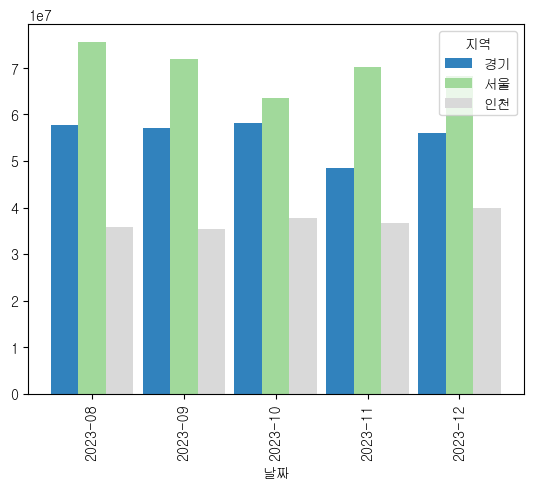

In [26]:
# 위 결과를 간단한 그래프로 그리기 (.plot(kind='bar', width=.9, colormap='tab20c'))
(df_result[df_result['구분'].eq('청과')]
 .pivot_table('매출액', index='날짜', columns='지역', aggfunc=sum)
 .plot(kind='bar', width=.9, colormap='tab20c'))

그 외 다양한 피벗테이블을 만들 수 있다

**아래의 코드를 쓰면 보다 간편하게 언피벗이 가능하다**

In [27]:
# 각 시트별로 언피벗하고 합치는 것을 좀더 간단한 코드로 하는 방법
df_dict = pd.read_excel('e_09_market.xlsx', sheet_name=None)
df_list = list(df_dict.items())[:5]
dfs = [df.melt('제품', var_name='지점', value_name='매출액').assign(날짜=name) for name, df in df_list]
df_result1 = pd.concat(dfs)
df_result1

,제품,지점,매출액,날짜
0,종합어묵 (300g),강남점,1930000,2023-08
1,유기농떡튀밥 (40g),강남점,320000,2023-08
2,염장다시마 (400g),강남점,1310000,2023-08
...,...,...,...,...
3397,생선가스 (300g),부천 옥길점,480000,2023-12
3398,게맛살 (178g),부천 옥길점,670000,2023-12
3399,멸치가루 (120g),부천 옥길점,1940000,2023-12


# 2. groupby <a class="anchor" id="chapter7"></a>

## 1. groupby가 필요한 이유 <a class="anchor" id="chapter8"></a>


<img src=https://i.ibb.co/s5098LD/image.png, width=600>

이 데이터에서 점수를 이용해 전체 등수를 구하는 것은 어렵지 않다.

**그런데 성별내에서의 등수를 구하려면 어떻게 해야 할까?**

→ 이럴 때 필요한 것이 `groupby` 함수

`groupby` 함수를 사용하면 다른 열의 특성으로 그룹화해서 함수를 적용하게 해준다

위 그림에서 `groupby`로 성별 열로 그룹화해서 `rank` 함수를 적용하면 성별내 등수를 구할 수 있다


원시(raw)데이터는 많은 열(특성)들이 존재하기에 그룹화해서 함수를 적용하지 못하면 원시데이터를 다룰 수 없다

→ `groupby`는 원시(raw) 데이터를 다루기 위해 가장 필수적인 함수

## 2. groupby 함수 <a class="anchor" id="chapter9"></a>

새로운 함수 소개

> pandas groupby

<img src=https://i.ibb.co/09D6rDh/image.png, width=600>


그룹 내에서 함수를 적용하게 해주는 함수

> groupby 함수의 인자(parameter)들

**by** 

그룹을 나누는 기준이 되는 열이나 행을 지정하는 인자. 복수라면 리스트로 입력

 

**axis** (0 or 1)

그룹해서 함수를 행에 적용할 것인지 열에 적용할 것인지 지정하는 인자. 기본값은 열

 

**level**

인덱스로 그룹을 나눌 때 사용하는 인자

 

**as_index** (bool / 기본값은 True)

groupby로 집계 함수를 사용할 때 그룹이 인덱스가 될지 지정하는 인자

 

**sort** (bool / 기본값은 True)

그룹의 key로 정렬을 할 것인지 지정하는 인자

---

<br>

**groupby 함수의 구조**

`groupby` 함수는 인자보다 구조를 숙지하는 것이 더 중요하다



<img src=https://i.ibb.co/c2t4ykz/image.png, width=600>


1. 소괄호 안에 by (그룹의 기준)

2. 대괄호 안에 data(함수를 적용할 열)

3. 적용할 함수

이 세 부분의 구조로 되어 있다

---
<br>

In [28]:
# 실습 준비 코드
import pandas as pd
data1 = [['김판다', 'A', '남', 95], ['송중기', 'B', '남', 93],
         ['김나현', 'B', '여', 88], ['박효신', 'A', '남', 85],
         ['강승주', 'B', '여', 78], ['권보아', 'A', '여', 72]]
data2 = [['2021-01-01', '김판다', 10000], ['2021-01-01', '강승주', 2000],
         ['2021-01-02', '김판다', 20000], ['2021-01-02', '강승주', 5000],
         ['2021-01-03', '강승주', 8000], ['2021-01-03', '김판다', 5000]]
data3 = {'제품': ['A', 'B', 'B', 'A', 'C', 'A'], '판매량': [10, 20, 30, 40, 50, 60]}

df = pd.DataFrame(data1, columns=['이름', '반', '성별', '점수'])
df1 = df.copy()
df2 = pd.DataFrame(data2, columns=['날짜', '이름', '입금'])
df3 = pd.DataFrame(data3)

**groupby로 feature engineering 하기** <a class="anchor" id="chapter10"></a>

`groupby` 함수와 `rank` 함수 사용하기

In [29]:
# df1을 출력
df1

,이름,반,성별,점수
0,김판다,A,남,95
1,송중기,B,남,93
2,김나현,B,여,88
3,박효신,A,남,85
4,강승주,B,여,78
5,권보아,A,여,72


In [30]:
# df1에서 반으로 그룹화해서 점수열에 rank함수를 내림차순으로 적용해 반등수 구하기
df1.groupby('반')['점수'].rank(ascending=False)

0   1.00
1   1.00
2   2.00
3   2.00
4   3.00
5   3.00
Name: 점수, dtype: float64

In [31]:
# 위 결과를 반등수 열로 만들기
df1['반등수'] = df1.groupby('반')['점수'].rank(ascending=False)
df1

,이름,반,성별,점수,반등수
0,김판다,A,남,95,1.00
1,송중기,B,남,93,1.00
2,김나현,B,여,88,2.00
3,박효신,A,남,85,2.00
4,강승주,B,여,78,3.00
5,권보아,A,여,72,3.00


In [32]:
# df1에서 반과 성별로 그룹화해서 점수열에 rank함수를 내림차순으로 적용해 반등수 구하기
df1.groupby(['반', '성별'])['점수'].rank(ascending=False)

0   1.00
1   1.00
2   1.00
3   2.00
4   2.00
5   1.00
Name: 점수, dtype: float64

`groupby` 함수와 `shift` 함수 사용하기

In [33]:
# df2를 출력
df2

,날짜,이름,입금
0,2021-01-01,김판다,10000
1,2021-01-01,강승주,2000
2,2021-01-02,김판다,20000
3,2021-01-02,강승주,5000
4,2021-01-03,강승주,8000
5,2021-01-03,김판다,5000


In [34]:
# df2에서 각 사람의 전일 입금액 구하기
df2.groupby('이름')['입금'].shift()

0        NaN
1        NaN
2   10000.00
3    2000.00
4    5000.00
5   20000.00
Name: 입금, dtype: float64

In [35]:
# df2에서 각 사람의 전일 입금액 구하기
df2['전일입금'] = df2.groupby('이름')['입금'].shift()
df2

,날짜,이름,입금,전일입금
0,2021-01-01,김판다,10000,NaN
1,2021-01-01,강승주,2000,NaN
2,2021-01-02,김판다,20000,10000.00
3,2021-01-02,강승주,5000,2000.00
4,2021-01-03,강승주,8000,5000.00
5,2021-01-03,김판다,5000,20000.00


`groupby` 함수와 `cumcount` 함수 사용하기

새로운 함수 소개

> pandas cumcount

<img src=https://i.ibb.co/5RHRgtx/image.png, width=600>


그룹화해서 각 항목마다 순번을 매기는 함수 (반드시 groupby와 쓴다)

excel의 countif와 유사하다


> cumcount 함수의 인자(parameter)들

**ascending**(True 또는 False / 기본값은 True)


오름차순으로 순번을 부여할 것인지 내림차순으로 순번을 부여할 것인지 결정하는 인자

기본값은 True이며 오름차순이고 위에서부터 0부터 넘버링 한다

---

<br>

In [36]:
# 실습에 쓰일 df3 출력
df3

,제품,판매량
0,A,10
1,B,20
2,B,30
3,A,40
4,C,50
5,A,60


In [37]:
# cumcount 함수를 이용해 각 제품을 그룹화해서 나온 순서대로 순번 붙이기
df3.groupby('제품').cumcount()

0    0
1    0
2    1
3    1
4    0
5    2
dtype: int64

In [38]:
# 위 결과를 순번 열로 만들기
df3['순번'] = df3.groupby('제품').cumcount()
df3

,제품,판매량,순번
0,A,10,0
1,B,20,0
2,B,30,1
3,A,40,1
4,C,50,0
5,A,60,2


In [39]:
# index를 제품, columns를 순번으로 판매량을 values로 하는 피벗테이블 만들기
df3.pivot_table('판매량', index='제품', columns='순번').fillna(0)

순번,0,1,2
제품,,,
A,10.00,40.00,60.00
B,20.00,30.00,0.00
C,50.00,0.00,0.00


그 외 feature engineering에 쓰였던 많은 함수들을 `groupby`와 함께 사용할 수 있다

**groupby로 집계함수 적용하기** <a class="anchor" id="chapter11"></a>

- `groupby` 함수로 집계함수도 적용할 수 있다.

- `unstack` 과 함께 사용하면 마치 피벗테이블과 같은 결과를 얻을 수 있다

<img src=https://i.ibb.co/P4BMjPx/image.png, width=600>

In [40]:
# 실습에 쓰일 df 출력(df1과 같다)
df

,이름,반,성별,점수
0,김판다,A,남,95
1,송중기,B,남,93
2,김나현,B,여,88
3,박효신,A,남,85
4,강승주,B,여,78
5,권보아,A,여,72


In [41]:
# df에서 반과 성별로 나눠 점수의 평균 구하기
df.groupby(['반', '성별'])['점수'].mean()

반  성별
A  남    90.00
   여    72.00
B  남    93.00
   여    83.00
Name: 점수, dtype: float64

In [42]:
# 위 결과를 피벗테이블과 같은 교차표로 만들기
df.groupby(['반', '성별'])['점수'].mean().unstack()

성별,남,여
반,,
A,90.00,72.00
B,93.00,83.00


**채권 데이터로 여러가지 그룹 집계하기** <a class="anchor" id="chapter12"></a>

파일명 : c_10_bond.csvt


<img src=https://i.ibb.co/gM6dq5T/image.png, width=600>

이 데이터는 일자별, 팀별, 종목별로 나눠 액면가와 시장가가 나와있는 데이터 프레임이다

위 데이터로 일별 시장가와 액면가의 추이를 집계해보자

또한 2023Q1과 2023Q2의 일자별 추이를 집계해보자

csvt 파일이지만 `read_csv` 함수로 읽을 수 있다.

이 파일은 CP949로 인코딩하는 것이 필요한데 `read_csv`함수의 `encoding` 인자를 사용하면 된다

일자열을 datetime 자료형으로 불러오고 싶다면 `parse_dates` 인자를 사용하자

(주의 : `parse_dates` 인자는 단수의 열이라도 리스트로 입력해야 한다)

---

<br>

<a class="anchor" id="chapter12"></a>

In [60]:
# 위 파일을 encoding은 CP949, 일자열의 자료형은 datetime으로 지정해 데이터프레임으로 불러 df_bond로 지정
import pandas as pd
pd.options.display.max_rows = 6
df_bond = pd.read_csv('c_10_bond.csvt', encoding='CP949', low_memory=False, parse_dates=['일자'])
df_bond

,일자,종목코드,팀점코드,펀드코드,통화,발행자등급,종목등급,환율,액면가,시장가,상품분류
0,2023-01-01,KR310607AC75797,4120500,L0050797,KRW,AAA,AAA,NaN,53632,52963,NaN
1,2023-01-01,KR310202AC73824,4120500,L0050797,KRW,AAA,AAA,NaN,268160,262526,NaN
2,2023-01-01,KR310203AC82377,4120500,L0050797,KRW,AAA,AAA,NaN,67040,66349,NaN
...,...,...,...,...,...,...,...,...,...,...,...
168619,2023-06-30,HW9999900031763,9999999,S1090987,KRW,AA-,AA-,1.00,5706,6016,CD/CP
168620,2023-06-30,HW9999900036461,9999999,S1090987,KRW,AA-,AA-,1.00,6393,6093,CD/CP
168621,2023-06-30,HW9999900033824,9999999,S1090987,KRW,AA-,AA-,1.00,6462,6501,CD/CP


필터링 실습

In [44]:
# df_bond를 2023년 3월 1일 이후의 데이터만 필터링하기
cond1 = df_bond['일자'] >= '2023-03'
df_bond[cond1]

,일자,종목코드,팀점코드,펀드코드,통화,발행자등급,종목등급,환율,액면가,시장가,상품분류
52047,2023-03-01,KR103501GA25723,4121000,L0040564,KRW,NaN,NaN,NaN,40224,-40032,NaN
52048,2023-03-01,KR310101GC16357,4121000,L0040564,KRW,NaN,NaN,NaN,53632,52956,NaN
52049,2023-03-01,KR310505AD24222,4121000,L0040564,KRW,AAA,AAA,NaN,40224,38740,NaN
...,...,...,...,...,...,...,...,...,...,...,...
168619,2023-06-30,HW9999900031763,9999999,S1090987,KRW,AA-,AA-,1.00,5706,6016,CD/CP
168620,2023-06-30,HW9999900036461,9999999,S1090987,KRW,AA-,AA-,1.00,6393,6093,CD/CP
168621,2023-06-30,HW9999900033824,9999999,S1090987,KRW,AA-,AA-,1.00,6462,6501,CD/CP


`groupby` 실습

- 시간의 흐름에 따라 액면가와 시장가 살펴보기

In [45]:
# 시간의 흐름에 따라 일자별 액면가와 시장가 집계하기
df_bond.groupby('일자')[['액면가','시장가']].sum()

,액면가,시장가
일자,,
2023-01-01,6732328,6814690
2023-01-02,6722595,6805099
2023-01-03,6870190,6959289
...,...,...
2023-06-28,7464718,7710832
2023-06-29,7581121,7826814
2023-06-30,7360874,7604406


<Axes: xlabel='일자'>

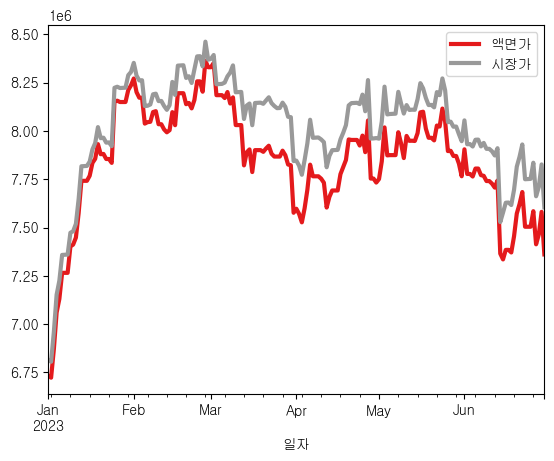

In [46]:
# 시간의 흐름에 따라 일자별 액면가와 시장가 집계결과를 그래프로 (.plot(lw=3, colormap='Set1'))
df_bond.groupby('일자')[['액면가','시장가']].sum().plot(lw=3, colormap='Set1')

In [61]:
# 위 피벗테이블을 df_pivot으로 지정하기
df_pivot = df_bond.groupby('일자')[['액면가','시장가']].sum()
df_pivot

,액면가,시장가
일자,,
2023-01-01,6732328,6814690
2023-01-02,6722595,6805099
2023-01-03,6870190,6959289
...,...,...
2023-06-28,7464718,7710832
2023-06-29,7581121,7826814
2023-06-30,7360874,7604406


In [63]:
pd.options.display.max_rows = 6
url = "C://Users//KimPanda//ipynb//hanhwa//7주차//e_03_04_sheet02.xlsx"
df = pd.read_excel(url, parse_dates=['date'])
df

,date,nation,continent,H/A,oppenent,o_continent,score,o_score,tournament,result
0,1993-08-08,Bolivia,South America,Home,Uruguay,South America,3,1,Others,Win
1,1993-08-08,Uruguay,South America,Away,Bolivia,South America,1,3,Others,Lose
2,1993-08-08,Mexico,North America,Home,Brazil,South America,1,1,Frendly,Draw
...,...,...,...,...,...,...,...,...,...,...
47839,2022-06-14,Japan,Asia,Away,Tunisia,Africa,0,3,Others,Lose
47840,2022-06-14,Korea,Asia,Home,Egypt,Africa,4,1,Frendly,Win
47841,2022-06-14,Egypt,Africa,Away,Korea,Asia,1,4,Frendly,Lose


In [64]:
df1 = df.groupby([df['date'].dt.to_period(freq='Y'), 'continent'])['score'].mean().unstack()
df1

continent,Africa,Asia,Europe,North America,Oceania,South America
date,,,,,,
1993,1.09,1.55,1.48,1.54,1.00,1.46
1994,1.20,1.10,1.38,1.10,1.17,1.34
1995,1.21,1.17,1.44,1.32,1.51,1.55
...,...,...,...,...,...,...
2020,1.15,1.16,1.20,1.39,NaN,1.68
2021,1.19,1.40,1.48,1.45,2.00,1.16
2022,1.09,1.29,1.24,1.26,1.44,1.58


In [65]:
from pandasecharts import echart
df1.round(3).reset_index().echart.line(x='date', ys=['Asia', 'Europe'], xtype='category').render_notebook()

In [62]:
from pandasecharts import echart
df_pivot.reset_index().echart.line(x='일자', ys=['액면가', '시장가'], xtype='category').render_notebook()

In [48]:
# 일자별 시장가와 액면가의 차이 구하기 (일자별 시장가 - 액면가)
df_pivot['시장가'].sub(df_pivot['액면가'])

일자
2023-01-01     82362
2023-01-02     82504
2023-01-03     89099
               ...  
2023-06-28    246114
2023-06-29    245693
2023-06-30    243532
Length: 181, dtype: int64

<Axes: xlabel='일자'>

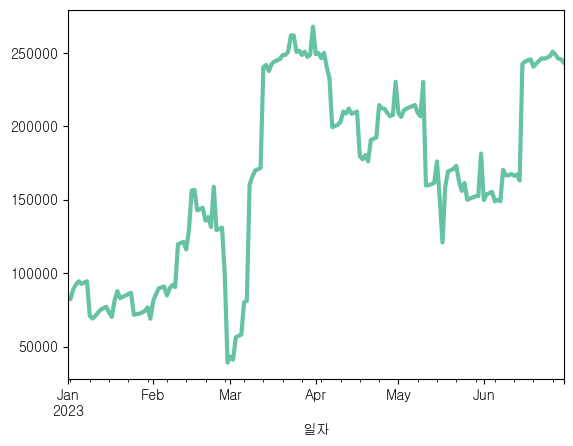

In [49]:
# 일자별 시장가와 액면가의 차이를 그래프로 그리기 (.plot(lw=3, colormap='Set2'))
df_pivot['시장가'].sub(df_pivot['액면가']).plot(lw=3, colormap='Set2')

<Axes: xlabel='일자'>

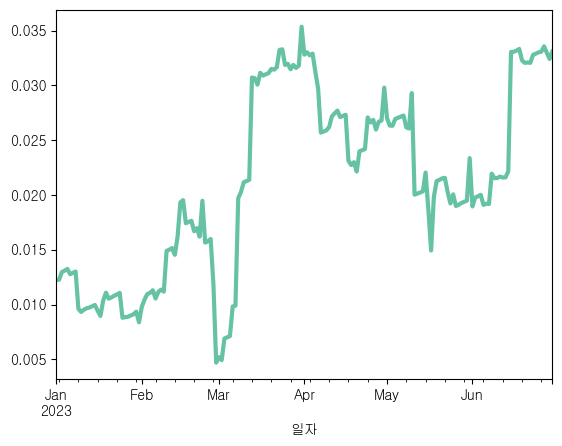

In [50]:
# 일자별 시장가와 액면가의 차이를 비율로 구하기 (일자별 시장가 - 액면가에서 시장가 나누어 비율 구하여 그래프)
df_pivot['시장가'].sub(df_pivot['액면가']).div(df_pivot['액면가']).plot(lw=3, colormap='Set2')

- 각 쿼터의 일별 시장가의 추이 집계하기

In [51]:
# df_bond에서 quarter만 구분해서 quarter열 만들기
df_bond['quarter'] = df_bond['일자'].dt.to_period(freq='Q')
df_bond

,일자,종목코드,팀점코드,펀드코드,통화,발행자등급,종목등급,환율,액면가,시장가,상품분류,quarter
0,2023-01-01,KR310607AC75797,4120500,L0050797,KRW,AAA,AAA,NaN,53632,52963,NaN,2023Q1
1,2023-01-01,KR310202AC73824,4120500,L0050797,KRW,AAA,AAA,NaN,268160,262526,NaN,2023Q1
2,2023-01-01,KR310203AC82377,4120500,L0050797,KRW,AAA,AAA,NaN,67040,66349,NaN,2023Q1
...,...,...,...,...,...,...,...,...,...,...,...,...
168619,2023-06-30,HW9999900031763,9999999,S1090987,KRW,AA-,AA-,1.00,5706,6016,CD/CP,2023Q2
168620,2023-06-30,HW9999900036461,9999999,S1090987,KRW,AA-,AA-,1.00,6393,6093,CD/CP,2023Q2
168621,2023-06-30,HW9999900033824,9999999,S1090987,KRW,AA-,AA-,1.00,6462,6501,CD/CP,2023Q2


In [52]:
# df_bond에서 해당 일자는 각 쿼터에서 몇번째 날짜인지를 반환하는 D+열 만들기
df_bond['D+'] = df_bond.groupby('quarter')['일자'].rank(method='dense').astype('int')
df_bond

,일자,종목코드,팀점코드,펀드코드,통화,발행자등급,종목등급,환율,액면가,시장가,상품분류,quarter,D+
0,2023-01-01,KR310607AC75797,4120500,L0050797,KRW,AAA,AAA,NaN,53632,52963,NaN,2023Q1,1
1,2023-01-01,KR310202AC73824,4120500,L0050797,KRW,AAA,AAA,NaN,268160,262526,NaN,2023Q1,1
2,2023-01-01,KR310203AC82377,4120500,L0050797,KRW,AAA,AAA,NaN,67040,66349,NaN,2023Q1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
168619,2023-06-30,HW9999900031763,9999999,S1090987,KRW,AA-,AA-,1.00,5706,6016,CD/CP,2023Q2,91
168620,2023-06-30,HW9999900036461,9999999,S1090987,KRW,AA-,AA-,1.00,6393,6093,CD/CP,2023Q2,91
168621,2023-06-30,HW9999900033824,9999999,S1090987,KRW,AA-,AA-,1.00,6462,6501,CD/CP,2023Q2,91


D+열을 만들때 위의 경우에는 모든 날짜의 데이터가 존재하기에 
```python
.rank(method='dense')
```
코드로 D+열을 만들 수 있다.

다른 경우에는 추후 배울 시계열 함수들을 이용하는 것이 낫다

In [53]:
# df_bond를 이용해 시장가를 일자별로 index는 D+ columns는 quarter로 합산해서 집계하기(pivot_table)
df_bond.pivot_table('시장가', index='D+', columns='quarter', aggfunc='sum')

quarter,2023Q1,2023Q2
D+,,
1,6814690.00,7846476.00
2,6805099.00,7820386.00
3,6959289.00,7773243.00
...,...,...
89,8071512.00,7710832.00
90,7844367.00,7826814.00
91,NaN,7604406.00


In [54]:
# df_bond를 이용해 시장가를 일자별로 index는 D+ columns는 quarter로 합산해서 집계하기(groupby + unstack)
df_bond.groupby(['D+', 'quarter'])['시장가'].sum().unstack()

quarter,2023Q1,2023Q2
D+,,
1,6814690.00,7846476.00
2,6805099.00,7820386.00
3,6959289.00,7773243.00
...,...,...
89,8071512.00,7710832.00
90,7844367.00,7826814.00
91,NaN,7604406.00


<Axes: xlabel='D+'>

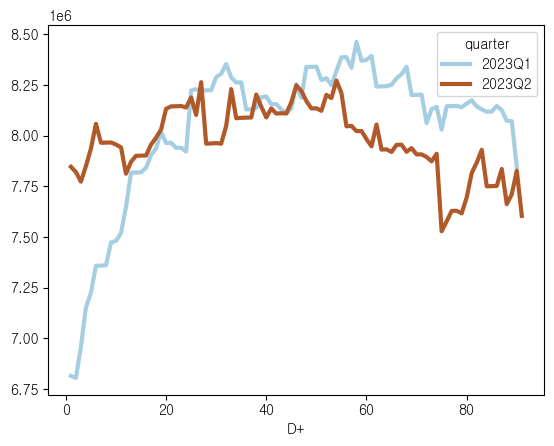

In [56]:
# 위 결과를 그래프로 그리기 (.plot(lw=2, colormap='Paired'))
df_bond.groupby(['D+', 'quarter'])['시장가'].sum().unstack().plot(lw=3, colormap='Paired')